In [1]:
import pandas as pd
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as ticker

import math

In [4]:
graph_names=["4039_dense_graph","45100_sparse_graph","facebook"]

columns=[str(x)+"_constr" for x in range(1,21)]+[str(x)+"_algo" for x in range(1,21)]

data=pd.DataFrame(
    columns=["name"]+columns
)

for graph in graph_names:
    
    row_construction = pd.read_csv('results/'+graph+'_construction.txt', sep=" ", header=None).dropna(1)
    row_algo = pd.read_csv('results/'+graph+'_algo.txt', sep=" ", header=None).dropna(1)
    row=pd.concat([row_construction,row_algo],axis=1)
    
    row.columns=columns
    row["name"]=graph
    
    data=pd.concat([data,row])
    
data.reset_index(inplace=True,drop=True)

data

/tmp/ipykernel_45972/835772895.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  row_construction = pd.read_csv('results/'+graph+'_construction.txt', sep=" ", header=None).dropna(1)
/tmp/ipykernel_45972/835772895.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  row_algo = pd.read_csv('results/'+graph+'_algo.txt', sep=" ", header=None).dropna(1)
/tmp/ipykernel_45972/835772895.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  row_construction = pd.read_csv('results/'+graph+'_construction.txt', sep=" ", header=None).dropna(1)
/tmp/ipykernel_45972/835772895.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  row_algo = pd.read_csv('results/'+graph+'_algo.txt', sep=" ", header=None).dropna(1)
/tmp/ipykernel_45972/835772895.py:11: FutureWarning: In a future

,name,1_constr,2_constr,3_constr,4_constr,5_constr,6_constr,7_constr,8_constr,9_constr,...,11_algo,12_algo,13_algo,14_algo,15_algo,16_algo,17_algo,18_algo,19_algo,20_algo
0,4039_dense_graph,298,561,521,321,278,278,260,230,239,...,19731,19511,19753,20361,19793,19846,19990,19565,19811,19789
1,45100_sparse_graph,75,76,57,51,44,41,37,37,40,...,82,75,75,81,76,77,77,80,78,79
2,facebook,2,10,4,3,3,5,7,3,3,...,17,20,18,19,17,18,15,19,19,16


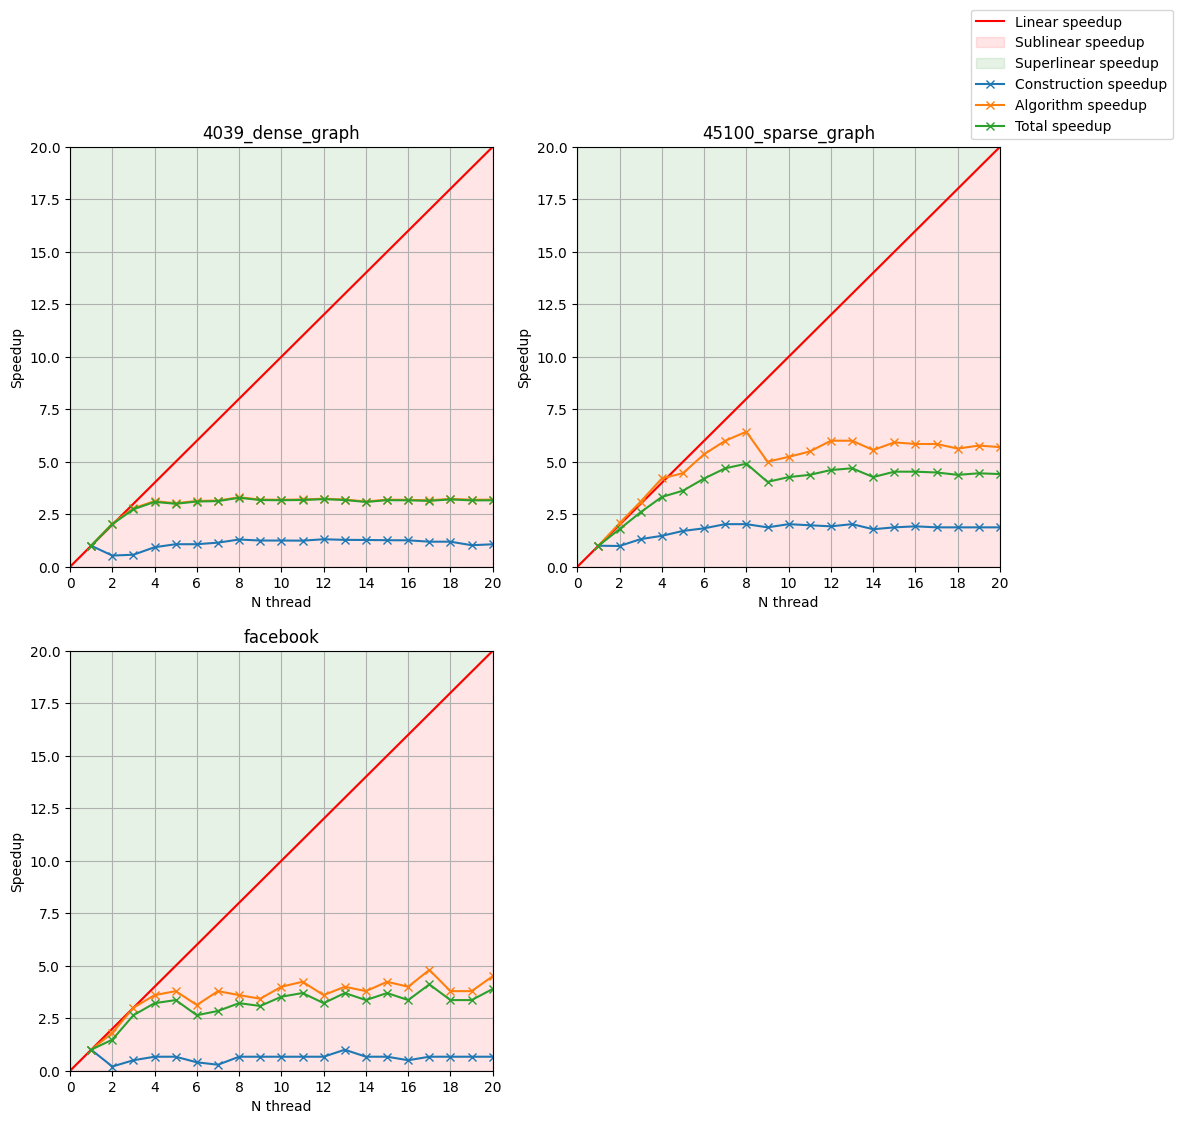

In [5]:
def plot_(max_thread:int):

    fig,axs=plt.subplots(math.ceil(data.shape[0]/2),2,figsize=(12,math.ceil(data.shape[0]/2)*6))
    
    axs=[item for sublist in axs for item in sublist]
    
    for index,row in data.iterrows():
        
        axs[index].set_xlabel("N thread")
        axs[index].set_ylabel("Speedup")
        
        axs[index].set_xlim(0,max_thread)
        axs[index].set_ylim(0,max_thread)
        
        axs[index].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        
        axs[index].set_title(row["name"])
        
        line = mlines.Line2D([0, 1], [0, 1], color='red',label="Linear speedup")
        transform = axs[index].transAxes
        line.set_transform(transform)
        axs[index].add_line(line)
        
        axs[index].fill_between([x for x in range(0,max_thread+1)],
                                [x for x in range(0,max_thread+1)],
                                alpha=0.1,color="red",label="Sublinear speedup")
        
        axs[index].fill_between([x for x in range(0,max_thread+1)],
                                [x for x in range(0,max_thread+1)],
                                max_thread, alpha=0.1,color="green", label="Superlinear speedup")
        
        axs[index].plot([x for x in range(1,max_thread+1)],
                           [row["1_constr"]/row[str(x)+"_constr"] for x in range(1,max_thread+1)],
                           '-x',
                           label="Construction speedup")
        
        axs[index].plot([x for x in range(1,max_thread+1)],
                           [row["1_algo"]/row[str(x)+"_algo"] for x in range(1,max_thread+1)],
                           '-x',
                           label="Algorithm speedup")
        
        axs[index].plot([x for x in range(1,max_thread+1)],
                           [(row["1_algo"]+row["1_constr"])/(row[str(x)+"_algo"]+row[str(x)+"_constr"]) for x in range(1,max_thread+1)],
                           '-x',
                           label="Total speedup")
        
        axs[index].grid()
        
        handles, labels = axs[index].get_legend_handles_labels()
    
    fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.05, 1))
    
    for index in range(data.shape[0],len(axs)):
        axs[index].remove()

plot_(20)